In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

In [2]:
df = pd.read_csv('../input/qualification-status-dataset/Qualification.csv')

In [3]:
df.head()

,registrationID,subscriberID,date,callEvent,mobile,geospatial_score,call_data_score,modularity,status
0,1234,8760,1122018,6793910055,9772855482,32,26,0.166660,Q
1,1234,8760,1122018,7890161114,9772855482,26,32,0.284125,Q
2,1234,8760,1122018,6651610090,9772855482,26,99,0.271686,Q
3,1234,8760,1122018,5349298593,9772855482,25,25,0.314368,Q
4,1234,8760,1122018,4855756992,9772855482,25,26,0.358138,Q


In [4]:
df.tail()

,registrationID,subscriberID,date,callEvent,mobile,geospatial_score,call_data_score,modularity,status
495,5583,4113,7122018,1012454303,8225612216,100,26,0.286255,Q
496,5583,4113,7122018,1012454333,8225612216,26,100,0.355503,Q
497,5583,4113,7122018,1012454366,8225612216,100,100,0.358625,Q
498,5583,4113,7122018,1012454393,8225612216,26,26,0.296057,Q
499,5583,4113,7122018,1012454438,8225612216,26,100,0.272500,Q


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   registrationID    500 non-null    int64  
 1   subscriberID      500 non-null    int64  
 2   date              500 non-null    int64  
 3   callEvent         500 non-null    int64  
 4   mobile            500 non-null    int64  
 5   geospatial_score  500 non-null    int64  
 6   call_data_score   500 non-null    int64  
 7   modularity        500 non-null    float64
 8   status            500 non-null    object 
dtypes: float64(1), int64(7), object(1)
memory usage: 35.3+ KB


In [6]:
df.describe(include='all')

,registrationID,subscriberID,date,callEvent,mobile,geospatial_score,call_data_score,modularity,status
count,500.000000,500.000000,5.000000e+02,5.000000e+02,5.000000e+02,500.000000,500.000000,500.000000,500
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NQ
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274
mean,5113.600000,4980.200000,3.762018e+06,1.830244e+09,9.071426e+09,43.208000,50.416000,0.340642,NaN
std,3084.691051,2544.547584,1.793553e+06,2.088375e+09,8.911070e+08,30.249078,34.256181,0.100823,NaN
min,1234.000000,1634.000000,1.122018e+06,4.489190e+07,7.766213e+09,1.000000,1.000000,0.000000,NaN
25%,2314.000000,3468.000000,2.122018e+06,1.012454e+09,8.225612e+09,26.000000,26.000000,0.285406,NaN
50%,5583.000000,4113.000000,3.122018e+06,1.012454e+09,9.772855e+09,26.000000,31.000000,0.319688,NaN
75%,6623.000000,6926.000000,5.122018e+06,1.012454e+09,9.776632e+09,32.000000,100.000000,0.378844,NaN


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

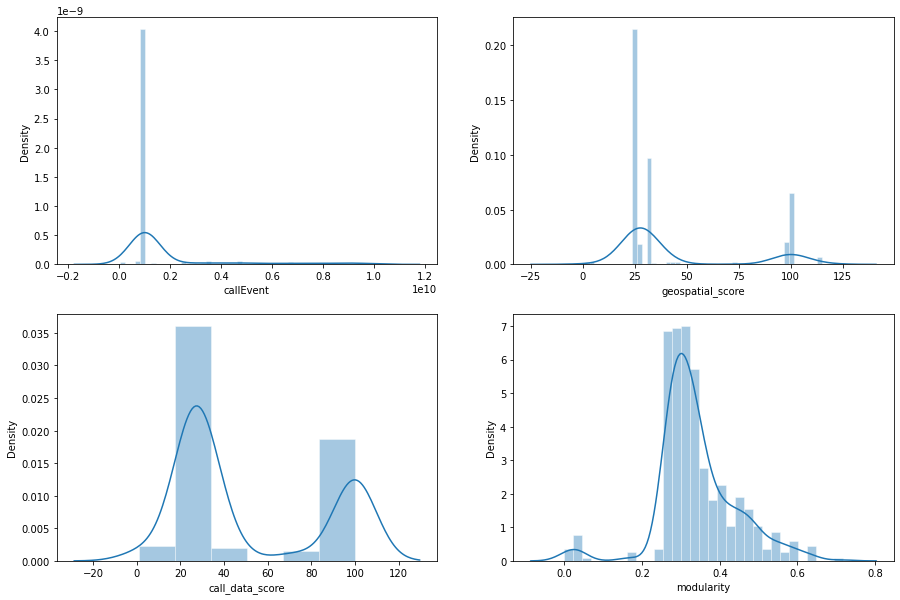

In [7]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
sns.set_style('dark')
sns.set_theme(context='notebook',
    style='darkgrid',
    palette='icefire',
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None)
sns.distplot(df['callEvent'],ax=ax[0,0])
sns.distplot(df['geospatial_score'],ax=ax[0,1])
sns.distplot(df['call_data_score'],ax=ax[1,0])
sns.distplot(df['modularity'],ax=ax[1,1])
plt.show()

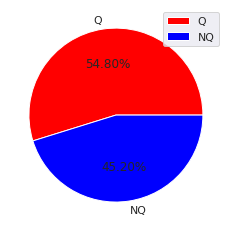

In [8]:
labels=['Q','NQ']
plt.pie(df['status'].value_counts(),labels=labels,colors=['red','blue'],autopct='%1.2f%%')
plt.legend()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='status', ylabel='count'>

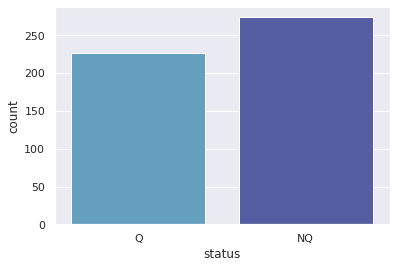

In [9]:
sns.countplot(df['status'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='status', ylabel='callEvent'>

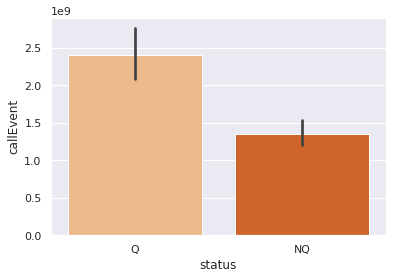

In [10]:
sns.barplot(df['status'],df['callEvent'],data=df,palette='Oranges')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='status', ylabel='geospatial_score'>

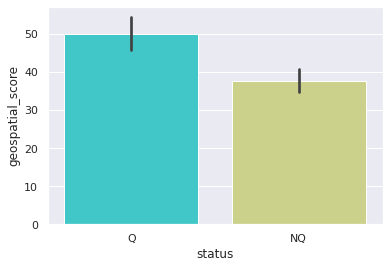

In [11]:
sns.barplot(df['status'],df['geospatial_score'],data=df,palette='rainbow')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='status', ylabel='call_data_score'>

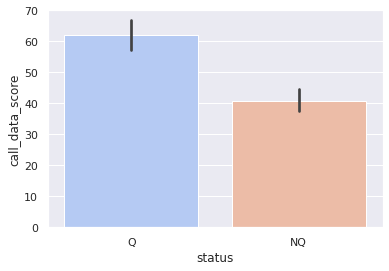

In [12]:
sns.barplot(df['status'],df['call_data_score'],data=df,palette='coolwarm')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='status', ylabel='modularity'>

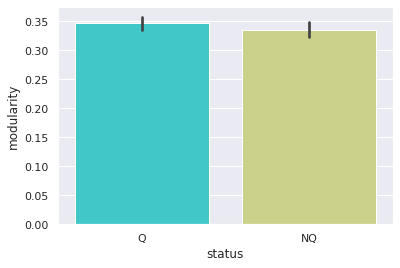

In [13]:
sns.barplot(df['status'],df['modularity'],data=df,palette='rainbow')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

<AxesSubplot:xlabel='modularity'>

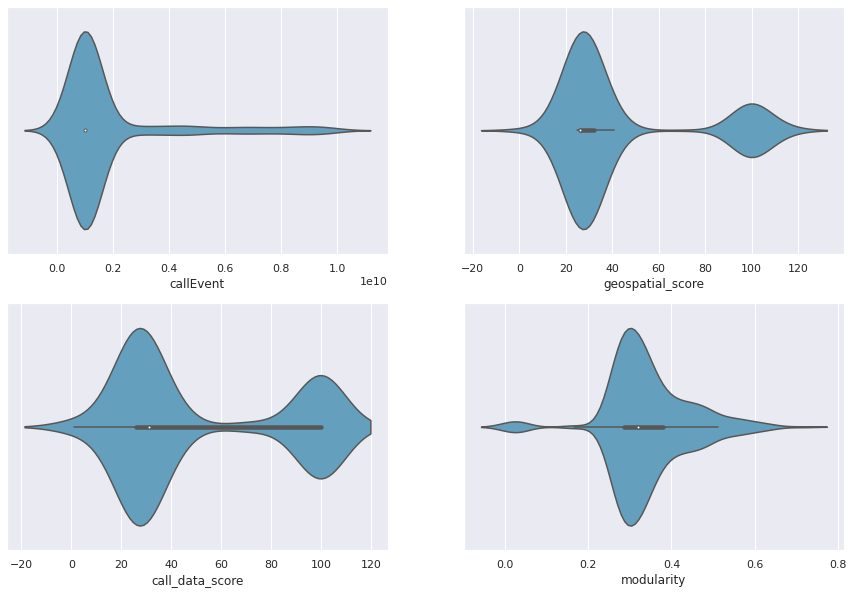

In [14]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
sns.violinplot(df['callEvent'],data=df,ax=ax[0,0])
sns.violinplot(df['geospatial_score'],data=df,ax=ax[0,1])
sns.violinplot(df['call_data_score'],data=df,ax=ax[1,0])
sns.violinplot(df['modularity'],data=df,ax=ax[1,1])

<AxesSubplot:>

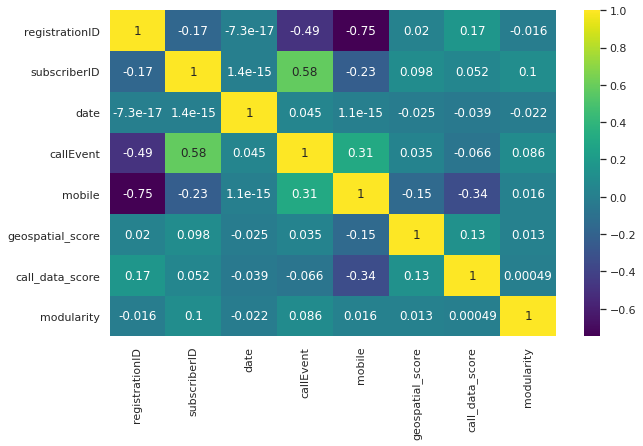

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [16]:
# sns.set_theme(context='notebook',
#     style='darkgrid',
#     palette='icefire',
#     font='sans-serif',
#     font_scale=1,
#     color_codes=True,
#     rc=None)
# sns.pairplot(df)
df.columns

Index(['registrationID', 'subscriberID', 'date', 'callEvent', 'mobile',
       'geospatial_score', 'call_data_score', 'modularity', 'status'],
      dtype='object')

In [17]:
def assign_value(x):
    if x == 'Q':
        return 1
    elif x == 'NQ':
        return 0
    

In [18]:
df['status'] = df['status'].apply(lambda x:assign_value(x))

In [19]:
X = df.drop(['registrationID','subscriberID','date','mobile','status'],axis=1)
y = df['status']

In [20]:
x1 = sm.add_constant(X)
result = sm.Logit(y,x1).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.582661
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 status   No. Observations:                  500
Model:                          Logit   Df Residuals:                      495
Method:                           MLE   Df Model:                            4
Date:                Sun, 06 Jun 2021   Pseudo R-squ.:                  0.1538
Time:                        16:09:46   Log-Likelihood:                -291.33
converged:                       True   LL-Null:                       -344.27
Covariance Type:            nonrobust   LLR p-value:                 5.525e-22
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.5838      0.424     -6.100      0.000      -3.414      -1.754
callEvent         3.255e-10   5.85e-11      5.561      0.000    2.11e-10     4.4e-10
geospatial_score     0.0122      0.003      3.677      0.000       0.006       0.019
call_data_score      0.0207      0.003      6.916      0.000       0.015       0.027
modularity           0.6784      0.993      0.683      0.494      -1.267       2.624
====================================================================================
"""

In [21]:
residual = result.resid_pearson

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 1080x720 with 0 Axes>

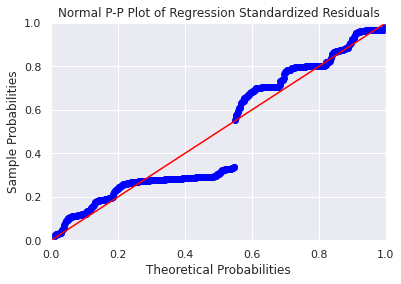

In [22]:
plt.figure(figsize=(15,10))
plot = sm.ProbPlot(residual)
plot.ppplot(line='45')
plt.title('Normal P-P Plot of Regression Standardized Residuals')
plt.show()

In [23]:
#VIF Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF Factor'] = [variance_inflation_factor(X.values,i)
                    for i in range(X.shape[1])]
vif

,Features,VIF Factor
0,callEvent,1.749637
1,geospatial_score,2.836787
2,call_data_score,2.879493
3,modularity,4.256018


In [24]:
X = X.drop('modularity',axis=1)


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log = LogisticRegression()
log.fit(X_train,y_train)
pred = log.predict(X_test)
log.score(X_train,y_train)

0.445

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error

In [29]:
confusion_matrix(y_test,pred)

array([[ 0, 52],
       [ 0, 48]])

In [30]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.48      1.00      0.65        48

    accuracy                           0.48       100
   macro avg       0.24      0.50      0.32       100
weighted avg       0.23      0.48      0.31       100



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
#RMSE
np.sqrt(mean_squared_error(y_test,pred))

0.7211102550927979

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_predict=rf.predict(X_test)
rf.score(X_train,y_train)

0.92

In [34]:
accuracy_score(y_test,rf_predict)

0.82

In [35]:
print(confusion_matrix(y_test,rf_predict))

[[45  7]
 [11 37]]


In [36]:
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        52
           1       0.84      0.77      0.80        48

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



In [37]:
#RMSE
np.sqrt(mean_squared_error(y_test,rf_predict))

0.4242640687119285

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree_predict = tree.predict(X_test)
tree.score(X_train,y_train)

0.92

In [40]:
accuracy_score(y_test,tree_predict)

0.81

In [41]:
confusion_matrix(y_test,tree_predict)

array([[45,  7],
       [12, 36]])

In [42]:
print(classification_report(y_test,tree_predict))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        52
           1       0.84      0.75      0.79        48

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100



In [43]:
#RMSE
np.sqrt(mean_squared_error(y_test,tree_predict))

0.43588989435406733

In [44]:
from sklearn.svm import SVC

In [45]:
svc = SVC()
svc.fit(X_train,y_train)
svc_predict = svc.predict(X_test)
svc.score(X_train,y_train)

0.63

In [46]:
accuracy_score(y_test,svc_predict)

0.65

In [47]:
confusion_matrix(y_test,svc_predict)

array([[50,  2],
       [33, 15]])

In [48]:
print(classification_report(y_test,svc_predict))

              precision    recall  f1-score   support

           0       0.60      0.96      0.74        52
           1       0.88      0.31      0.46        48

    accuracy                           0.65       100
   macro avg       0.74      0.64      0.60       100
weighted avg       0.74      0.65      0.61       100



In [49]:
#RMSE
np.sqrt(mean_squared_error(y_test,svc_predict))

0.5916079783099616

In [50]:
from sklearn.ensemble import GradientBoostingClassifier 

In [51]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc_predict = gbc.predict(X_test)
gbc.score(X_train,y_train)

0.9025

In [52]:
accuracy_score(y_test,gbc_predict)

0.83

In [53]:
confusion_matrix(y_test,gbc_predict)

array([[44,  8],
       [ 9, 39]])

In [54]:
print(classification_report(y_test,gbc_predict))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        52
           1       0.83      0.81      0.82        48

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100



In [55]:
#RMSE
np.sqrt(mean_squared_error(y_test,gbc_predict))

0.41231056256176607